## Cables

[Try this yourself](https://colab.research.google.com/github/DTUWindEnergy/TopFarm2/blob/master/docs/notebooks/cables.ipynb) (requires google account)


TOPFARM can use the Electrical Network Design package EDWIN to optimize the carray cabels as well as the substation position at each iteration of the layout optimization

### Import

In [1]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.constraint_components.boundary import XYBoundaryConstraint
from topfarm.easy_drivers import EasyScipyOptimizeDriver
from topfarm.cost_models.cost_model_wrappers import CostModelComponent
from topfarm._topfarm import TopFarmProblem, TopFarmGroup
from topfarm.cost_models.py_wake_wrapper import PyWakeAEPCostModelComponent
from topfarm.plotting import XYPlotComp
from topfarm.utils import plot_list_recorder
from topfarm.cost_models.economic_models.dtu_wind_cm_main import economic_evaluation

from py_wake.examples.data.iea37._iea37 import IEA37_WindTurbines
from py_wake import BastankhahGaussian
from py_wake.examples.data.hornsrev1 import Hornsrev1Site

from optiwindnet.api import WindFarmNetwork, MetaHeuristic

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


### Site

In [ ]:
n_wt = 200
x_init =  np.array([4268.128367839519, 1444.6302388855916, 3719.647505386246, 4420.793311382636, 4075.6145485382217, 1512.0045843376367, 3946.5495580772604, 5744.321907483697, 3597.408901425389, 2569.1224902174245, 2389.4071674957713, 84.24780283666777, 2358.068386795773, 2932.93024531242, 2361.114557193689, 5641.968021489104, 4304.4703463194255, 3140.7085433433986, 3324.3616507432316, 2664.810786600258, 1511.084690878982, 2260.171839185054, 2429.397913174907, 1145.979498930461, 5730.980023279473, 4252.839054726238, 2085.9187343271383, 2722.9437121966866, 3406.0225976321885, 1408.82579316389, 4135.743841462732, 4346.939345104813, 1085.108968904049, 2774.0551519005576, 3898.668665028595, 1030.9939891426804, 2737.658745790911, 1053.95360217072, 2022.0309472644988, 2690.5821530137646, 5875.042384544006, 1057.4512982176911, 3957.8455184212694, 1431.3988183166543, 982.3397455269879, 5475.548438366478, 5632.822939674167, 2543.838419779717, 923.1882215316363, 5867.022459249642, 1253.376775870062, 2634.680707091123, 1573.6909456977612, 3772.246896746225, 1316.5539954495837, 5823.674306681092, 5305.1840476934685, 4862.557070721005, 884.9319888910105, 3556.2623522749113, 720.4596323367778, 5885.997555505644, 5532.422287611459, 1855.113913065494, 579.4693725740387, 2675.092026862864, 845.168786136848, 1044.7078082015162, 3590.7570915979986, 5364.045490911428, 29.79823072236232, 3905.662623097332, 2281.4540888751385, 4759.036401598145, 4381.304762525907, 2299.582945876068, 2546.7646385918006, 4916.006386870765, 5213.254591824952, 5326.444944369384, 895.7591057727401, 3563.7609317429656, 922.6388766903992, 4057.9478988940973, 2010.1123895226676, 1533.0463656401669, 165.47425249501103, 2453.0331939757825, 576.9129914393387, 1128.1164380727014, 1566.3145014039085, 2278.6659925901927, 1714.6496664784477, 2116.5519977636022, 1625.007516083653, 2486.039407556813, 4635.320675131106, 1427.7970125521767, 454.3540148916181, 4770.44667171449, 2869.424626427403, 1465.5753336949913, 4542.524825971026, 2140.931546435927, 4166.26865581343, 665.2098742794608, 2908.0455254568506, 4594.791311467763, 208.61906497712934, 634.8782760366659, 4162.575440966611, 4385.286314610528, 4292.300081937115, 4190.038082432532, 5247.864008407756, 5445.3735968926, 4237.52716385256, 2918.364215876416, 2011.0863735050852, 1541.1790945600476, 596.9814413801333, 2080.958996807058, 3516.6596574883138, 5674.954961081035, 1617.7972688831558, 4384.625042071878, 3951.711095835198, 2815.9311537998433, 3962.2093266995557, 4997.390708238262, 3865.49791256837, 5160.094236967333, 5266.300728791203, 3387.184369138562, 1811.886209248752, 5929.277238368044, 1689.6563280393186, 119.63371993237315, 5869.738675507036, 3601.105537405957, 5801.639147519067, 4446.011969984017, 1029.0446734254394, 5172.670390176835, 4876.413350244271, 2114.3869923713673, 4261.2295420659675, 4147.0313048405005, 1993.077224986631, 5705.992165398169, 737.8278058962928, 1554.4184873572597, 275.9532977001136, 3511.552626626262, 1177.9358042113133, 767.5543730753868, 3847.2357298327092, 5613.388905955577, 2998.551790036145, 2216.5780283570957, 3579.2249333008153, 5151.492095397101, 4303.077432041358, 1400.6195122427698, 1075.2664242476358, 1300.0496819787584, 1739.789002526082, 1532.9944701260836, 1628.5348383941034, 3077.6596517781445, 163.49437980981074, 5690.628099518357, 5205.979161437638, 5286.492646763914, 1124.283655025321, 2684.8107708017874, 2440.8433409801205, 5139.226001351527, 4372.9966858428215, 373.22328547225527, 4157.651003166354, 511.69131110092536, 5392.283305918383, 654.1485751433182, 2439.38696855833, 2761.471914074189, 293.06294271893194, 3200.3565698085968, 5200.965657093262, 3922.975752492557, 4474.0860215175835, 2214.7355714933274, 4453.678130437514, 4847.432380119602, 5544.2402779954955, 802.6756704355291, 5572.251773883523, 5723.949808977126, 3547.6400706367112, 226.41596627723737])
y_init = np.array([-5707.656443497718, -9981.30757766057, -7851.907014472324, -2727.1410052788815, -4176.195826624831, -301.9105371105424, -9040.189291935554, -2090.783923518712, -9788.933934360635, -6114.724656043992, -438.2077025575548, -1949.885015072218, -9756.100622492451, -365.6205118678013, -2931.997737053359, -9878.601238058234, -7443.789305295507, -5859.784109059968, -280.7122617230695, -6593.998634701858, -6736.461786486524, -2598.6308533415413, -3603.2542655062593, -6071.719602881904, -6878.664400227463, -2588.6794690626957, -6437.225950486028, -681.6326400515348, -6595.096798379709, -1123.900765892334, -1548.8618508104269, -7104.002656073114, -6072.03614217915, -7136.038034697125, -4158.750080067391, -5540.163780387135, -4650.577792838006, -9831.28431765106, -2507.4104073164026, -4458.385996810329, -434.3521039914877, -1436.6395208444605, -2528.126122638442, -5194.8167208266195, -8276.24352906062, -5844.745087463952, -2510.2741888384594, -6230.4209454569145, -4355.751564051104, -774.4187219608867, -3565.882991612792, -5337.456700788313, -136.60634917165515, -1279.526980360074, -9477.961276026665, -3029.4617186976657, -4178.592367992453, -6022.047249700694, -6119.349832531964, -8119.267738265885, -5802.15917401802, -4298.73975194419, -2529.1334894042193, -8132.813479760249, -4938.869624686824, -2640.8603035393776, -7049.726692534203, -8450.36541633027, -623.461678394166, -9851.562917352114, -8587.64650753603, -4132.40836083861, -1148.294146436476, -4312.771907485519, -8329.909303899105, -5192.658324015117, -9662.780339504781, -5725.201499630003, -265.00837373362174, -5871.393658074801, -5646.670617835263, -9385.207860087326, -2701.6405220793918, -4544.027772258219, -8887.994095718994, -2740.129704852351, -9764.104862912258, -8726.562382074124, -8407.14361535195, -2662.54957483702, -6719.047090469843, -7415.896864377465, -7353.80737067851, -7036.54119879289, -9787.137507857498, -9446.525761975492, -8787.147307944118, -810.113630792737, -700.3242239731977, -430.41505593469867, -7052.485250135047, -8608.960578293081, -2242.0248642696097, -3135.9883471761564, -8855.529323677314, -5406.423297553766, -4571.591289620199, -6427.240427847507, -8351.481357637802, -5349.701069961214, -9824.761001434283, -7624.010808464009, -943.1961240001141, -3360.1762325747263, -2305.982792012672, -499.4045457948737, -9560.665697511346, -8094.241115101453, -7031.243364750277, -7137.70671973802, -701.0009899896808, -6768.200738047393, -3623.397874415537, -3370.406806774161, -4682.064609780352, -7646.128403100809, -583.2417171876425, -9025.607641999592, -5822.114733894149, -5608.304182720264, -182.3579017917909, -6549.796698829723, -1989.440408009525, -3898.2973969878753, -150.69502414928994, -8994.067905413904, -1999.2861246060556, -6893.7217678403695, -872.8227034311664, -2689.977010469483, -6602.2492068959145, -6743.596175588883, -8944.002635232748, -6499.573601762646, -7076.089448184473, -7617.060820694635, -9795.001195371678, -1185.5266642785057, -3149.551697174431, -8342.395009879776, -7984.251766775649, -7473.1813523573865, -1121.734325486241, -7060.369126525844, -4318.355468851093, -6855.883298338495, -1310.0247958376776, -408.7745043994484, -6337.504731947934, -621.4798880438433, -9511.10805828184, -5694.487387953513, -3475.147193707386, -3465.9947565287753, -7839.914651368645, -3437.8551169379034, -9147.796775801886, -3822.4637061612134, -688.7392449573315, -3689.378355530585, -960.88035264005, -6607.26399548333, -6228.705416599542, -6412.526305602207, -881.1132369328911, -8997.802017985578, -7074.1088957867505, -6491.072453411426, -3862.5210560086275, -61.202451959688766, -2622.728620709787, -4168.76897525973, -681.396554214766, -5183.819882173333, -6952.535212966116, -280.79286677843874, -7077.008916706183, -3681.450698110481, -1264.0674822734666, -1504.6651705608883, -6004.7771186082155, -5414.88102502789, -3164.7313032846946, -2890.8068353313643, -9717.439605182657, -3408.7629464390366, -1408.017657671441, -8756.506483845435, -2803.8476969915173, -2736.672379060301])
initial = np.column_stack((x_init, y_init))
boundary = np.array([(0, 0), (6000, 0), (6000, -10000), (0, -10000)])  # turbine boundaries
drivers = [EasyScipyOptimizeDriver(maxiter=10)]
windTurbines = IEA37_WindTurbines()
site = Hornsrev1Site()
wfm = BastankhahGaussian(site, windTurbines)


c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')


### Bathymetry

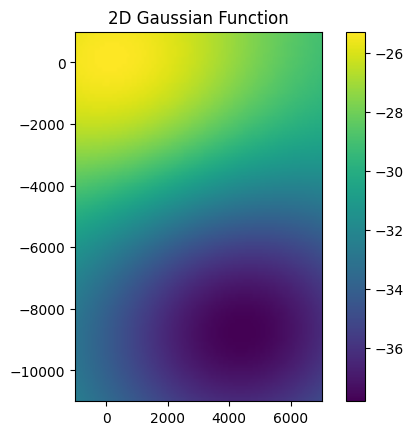

In [3]:
sigma = 3000.0
mu = 0.0

x_peak_1 = 1000
y_peak_1 = -1000
x_peak_2 = 4000
y_peak_2 = -8000
x1, y1 = np.meshgrid(np.linspace(0 - x_peak_1, 6000- x_peak_1, 100), np.linspace(-10000 - y_peak_1, 0 - y_peak_1, 100))
d1 = np.sqrt(x1*x1 + y1*y1)
g1 = np.exp(-((d1 - mu)**2 / (2.0 * sigma**2)))
x2, y2 = np.meshgrid(np.linspace(0 - x_peak_2, 6000- x_peak_2, 100), np.linspace(-10000 - y_peak_2, 0 - y_peak_2, 100))
d2 = np.sqrt(x2*x2 + y2*y2)
g2 = np.exp(-((d2 - mu)**2 / (2.0 * sigma**2)))
g = 5 * g1 - 8 * g2 - 30

plt.imshow(g, extent=(-1000, 7000, -11000, 1000), origin='lower', cmap='viridis')
plt.colorbar()
plt.title('2D Gaussian Function')
plt.show()

x = np.linspace(-1000, 7000, 100)
y = np.linspace(-11000, 1000, 100)

f = RegularGridInterpolator((x, y), g)

### Cables

In [4]:
x_ss_init = x_init.mean()
y_ss_init = y_init.mean()
turbines_pos=  np.column_stack((x_init, y_init))
substations_pos =  np.column_stack((x_ss_init, y_ss_init))

# 'obstacles' is an optional location attribute
obstaclesC = []

borderC =  np.array(
    [[-1000, -11000], [10000, -10000], [10000, 5000], [-1000, 5000]],
    dtype=float)

cables = np.array([(3, 100),(5, 150), (10, 250)])

wfn = WindFarmNetwork(turbinesC=turbines_pos, substationsC=substations_pos, cables=cables)
router = MetaHeuristic(time_limit=0.1)
res_optimize= wfn.optimize(router=router)
#G = wfn.optimize(turbines_pos)
cable_cost_ref = wfn.cost() # euro
cable_length_ref = wfn.length()  # m
cost_per_length_ref = cable_cost_ref / cable_length_ref # euro / m

wfn.plot()

AssertionError: 

### Economy

In [ ]:
Drotor_vector = [windTurbines.diameter()] * n_wt
power_rated_vector = [float(windTurbines.power(20))*1e-6] * n_wt
hub_height_vector = [windTurbines.hub_height()] * n_wt

# add additional cost model inputs for shore distance, energy price, project lifetime, rated rotor speed and water depth
distance_from_shore = 30         # [km]
energy_price = 0.1               # [Euro/kWh] What we get per kWh
project_duration = 25            # [years]
rated_rpm_array = [12] * n_wt    # [rpm]
simres = wfm(x_init, y_init)
aep = simres.aep().values.sum()
CF = aep / (windTurbines.power(20)*1e-9 * 24*365*n_wt)

eco_eval = economic_evaluation(distance_from_shore, energy_price, project_duration)
npv_ref = eco_eval.calculate_npv(rated_rpm_array, Drotor_vector, power_rated_vector, hub_height_vector, 30, aep/n_wt * np.ones(n_wt)*10**6, cabling_cost=cable_cost_ref)

### Python Functions

In [ ]:
# Water Depth
def water_depth_func(x, y, **kwargs):
    xnew, ynew = np.meshgrid(x, y)
    points = np.array([xnew.flatten(), ynew.flatten()]).T
    return - np.diag(f(points).reshape(n_wt, n_wt).T)

# Cables
def cable_func(x, y, x_substation, y_substation, **kwargs):
    try:
        wfn.optimize(
            turbinesC=np.column_stack((x, y)),
            substationsC=np.column_stack((float(x_substation[0]), float(y_substation[0]))),
            router=router
        )
        cost = wfn.cost()
    except Exception as e:
        print('Optimizer failed:', e)
        cost = 10

    return cost, {'cabling_length': wfn.length(), 'terse_links': wfn.terse_links()}

# Economy
def npv_func(AEP, water_depth, cabling_cost, **kwargs):
    eco_eval.calculate_npv(rated_rpm_array, Drotor_vector, power_rated_vector, hub_height_vector, water_depth, AEP/n_wt * np.ones(n_wt)*10**6, cabling_cost=cabling_cost)
    eco_eval.calculate_irr(rated_rpm_array, Drotor_vector, power_rated_vector, hub_height_vector, water_depth, AEP/n_wt * np.ones(n_wt)*10**6, cabling_cost=cabling_cost)
    CAPEX = eco_eval.project_costs_sums["CAPEX"]
    OPEX = eco_eval.project_costs_sums["OPEX"]
    return eco_eval.NPV, {'irr': eco_eval.IRR,
                          'OPEX': OPEX,
                          'CAPEX': CAPEX,}


### Components

In [ ]:
# Water Depth
water_depth_component = CostModelComponent(input_keys=[('x', x_init),('y', y_init)],
                                          n_wt=n_wt,
                                          cost_function=water_depth_func,
                                          objective=False,
                                          output_keys=[('water_depth', np.zeros(n_wt))])

# Cables
cable_component = CostModelComponent(input_keys=[('x', x_init),('y', y_init), ('x_substation', x_ss_init), ('y_substation', y_ss_init)],
                                     n_wt=n_wt,
                                     cost_function=cable_func,
                                     objective=False,
                                     output_keys=[('cabling_cost', 0)],
                                     additional_output = [
                                                ('cabling_length', 0.0),
                                                ('terse_links', np.zeros((30,)))
                                                ])

# Economy
npv_comp = CostModelComponent(input_keys=[('AEP', 0), ('water_depth', 30*np.ones(n_wt)), ('cabling_cost', 100000)],
                              n_wt=n_wt,
                              cost_function=npv_func,
                              objective=True,
                              maximize=True,
                              output_keys=[('npv', 0)],
                              additional_output=[('irr', 0),
                                                 ('CAPEX', 0),
                                                 ('OPEX', 0)])

# AEP
aep_comp = PyWakeAEPCostModelComponent(wfm, n_wt, objective=False)

### Problem Assembly

In [ ]:
cost_comp = TopFarmGroup([PyWakeAEPCostModelComponent(wfm, n_wt, objective=False), water_depth_component, cable_component, npv_comp])


tf = TopFarmProblem(
    design_vars=dict(zip('xy', initial.T), x_substation=x_ss_init, y_substation=y_ss_init),
    cost_comp=cost_comp,
    constraints=[XYBoundaryConstraint(boundary),
                 SpacingConstraint(500)
                 ],
    driver=drivers[0],
    plot_comp=XYPlotComp()
)


### Optimize

In [ ]:
cost, _, recorder = tf.optimize()


### Plot

In [ ]:
plot_list_recorder(recorder)

In [ ]:
x_opt = recorder['x'][-1]
y_opt = recorder['y'][-1]
x_sub_opt = recorder['x_substation'][-1]
y_sub_opt = recorder['y_substation'][-1]
terse_links = recorder['terse_links'][-1]
print(terse_links)
wfn.update_from_terse_links(terse_links=terse_links, turbinesC=np.column_stack((x_opt, y_opt)), substationsC= np.column_stack((float(x_sub_opt), float(y_sub_opt))))

wfn.plot()


Compare the result with optimization

In [ ]:
wfn.optimize(turbinesC=np.column_stack((x_opt, y_opt)), substationsC= np.column_stack((float(x_sub_opt), float(y_sub_opt))))

wfn.plot()

In [ ]:
import numpy as np
cables = None
cables_array = np.array(cables)
if cables is None:
    cables = [(10, 1)]

elif isinstance(cables, int):
    cables = [(cables, 1)]

elif cables_array.ndim == 1 and cables_array.shape[0] == 1 and isinstance(cables_array.item(), int):
    cables = [(int(cables_array[0]), 1)]
elif (cables_array.ndim == 1 and cables_array.shape[0] == 2):
    cables = [(int(cables_array[0]), float(cables_array[1]))]
elif cables_array.ndim == 2:
    if cables_array.shape[1] == 2:
        cables = [(int(cap), float(cost)) for cap, cost in cables_array]
else:
    raise ValueError(f"Invalid cable values: {cables}")

print('array cables:', cables_array)
print(cables)

In [ ]:
cables = 12
array_cables = np.array(cables)
print(array_cables)
print(array_cables.ndim)
print(array_cables.shape)
isinstance(cables_array.item(), int)